<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change runtime to T4 GPU
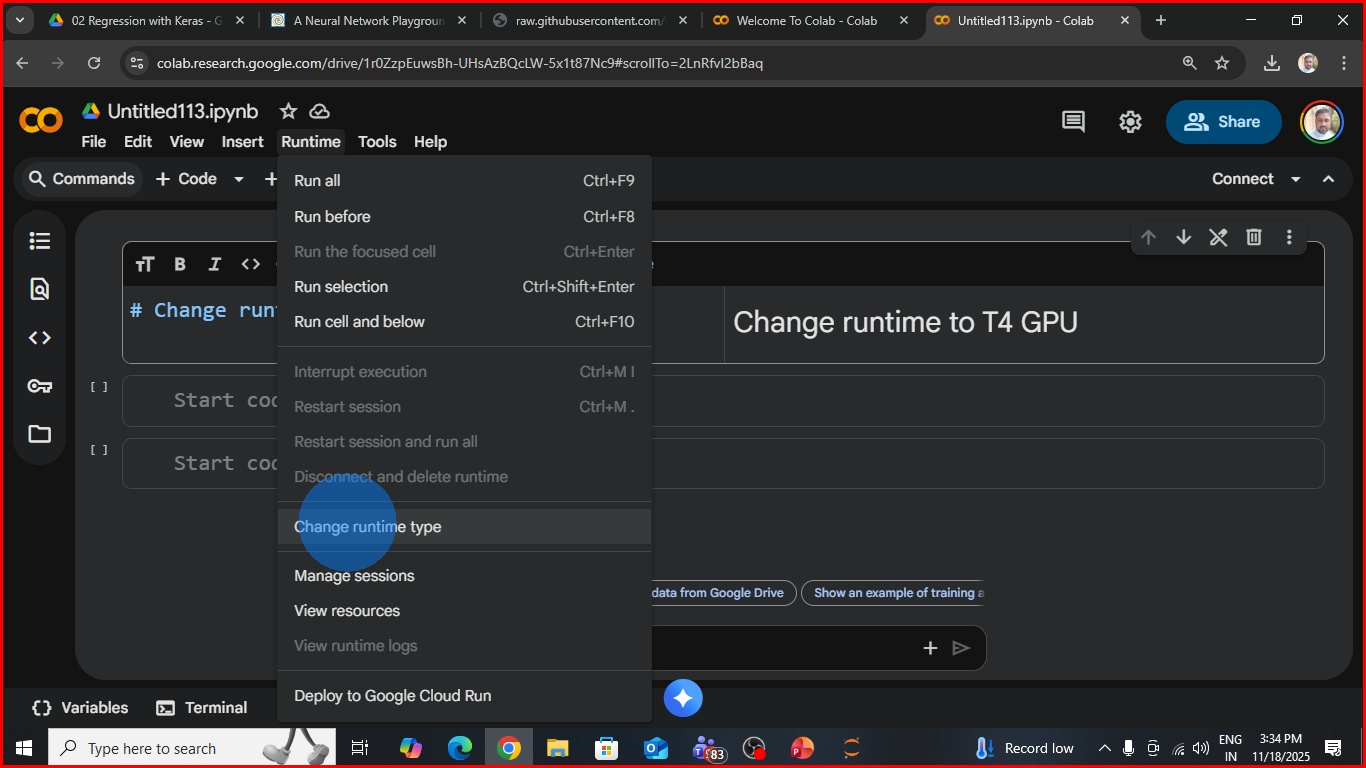

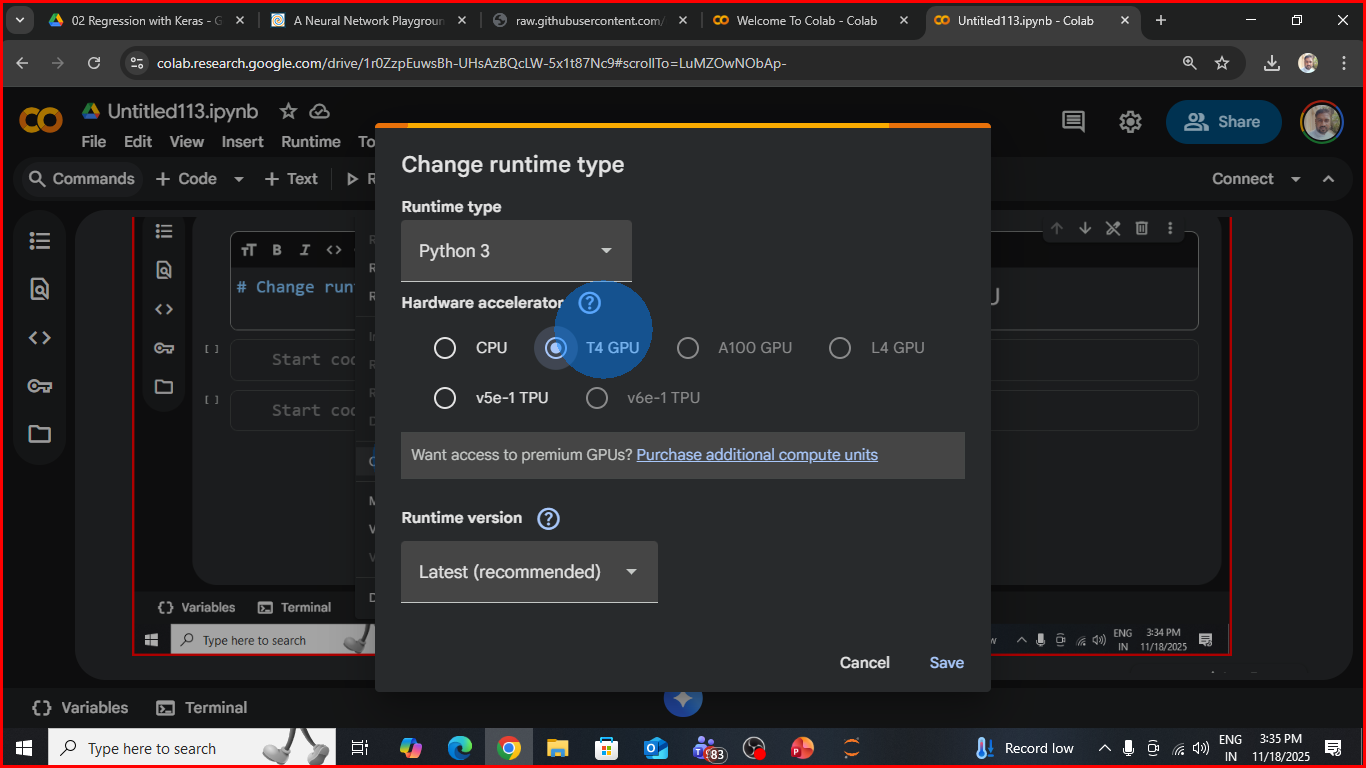

In [57]:
!pip install joblib

# Runtime > Change Runtime Type > T4 GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Perfom data ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
df.shape

(9568, 5)

# You are working as a data scientist at a thermal power plant, Your goal is to estimate the power output of the plant (PE)

# Features
1. AT - Atmospheric Temperature in degree celsius
2. V - Vacuum pressure in Pascals
3. AP - Atmospheric Pressure in Pascals
4. RH - Relative Humidity in percentage
5. PE (Target) - Power output of plant in Mega Watt

# Step 2 - Perform data quality checks

In [5]:
df.shape

(9568, 5)

In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
# Remove duplicates from dataset
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

In [8]:
# Check missing values in dataframe
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


<Axes: xlabel='PE', ylabel='Count'>

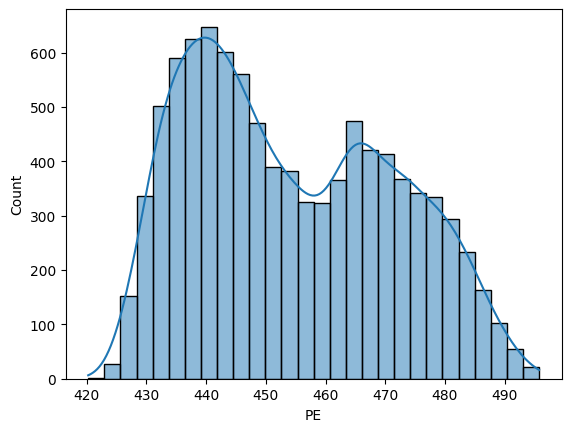

In [9]:
import seaborn as sns
sns.histplot(data=df, x="PE", kde=True)

# Step 3 - Seperate X and Y(PE)

In [10]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [11]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [14]:
xtrain.head()

,AT,V,AP,RH
5695,18.52,58.41,1013.77,99.89
7300,8.51,39.66,1015.16,86.61
9066,13.07,42.18,1014.98,87.77
6424,30.07,69.82,1010.39,57.53
6773,13.52,42.34,1017.97,95.34


In [15]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [16]:
xtest.head()

,AT,V,AP,RH
1087,33.26,68.51,1012.49,52.68
6308,8.48,38.50,1013.50,66.51
8021,8.75,36.30,1015.61,57.53
9483,20.78,62.52,1017.58,73.30
4459,19.39,68.61,1011.09,96.51


In [17]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [18]:
xtrain.shape

(7621, 4)

In [19]:
xtest.shape

(1906, 4)

# Step 5 - Apply preprocessing on X

In [20]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [22]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [23]:
num_pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [24]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [25]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


# Step 6 - Build the neural network
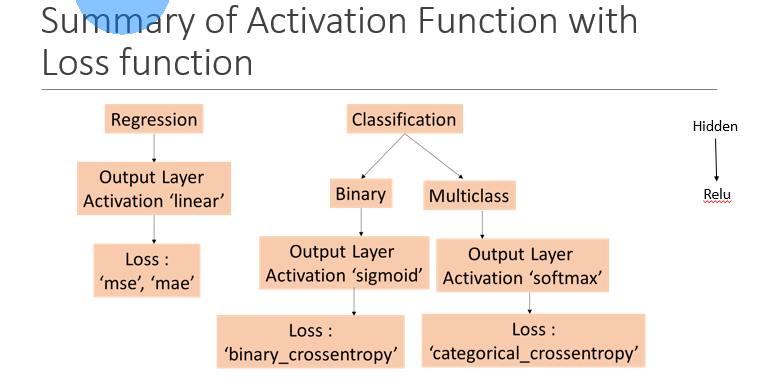

In [26]:
xtrain_pre.shape

(7621, 4)

In [27]:
xtrain_pre.shape[1]

4

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [29]:
model = Sequential(
    layers = [
        Input(shape=(xtrain_pre.shape[1],)),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=1, activation="linear")
    ]
)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [32]:
hist = model.fit(xtrain_pre, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 206590.7656 - mae: 454.2150 - val_loss: 203305.8594 - val_mae: 450.6306
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 201922.5625 - mae: 449.1375 - val_loss: 192826.3281 - val_mae: 439.0321
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 188601.2656 - mae: 434.1295 - val_loss: 171806.2969 - val_mae: 413.7383
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 163662.2969 - mae: 402.7850 - val_loss: 142146.3281 - val_mae: 370.2945
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 132864.8906 - mae: 354.2616 - val_loss: 116924.3828 - val_mae: 317.8011
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 109120.1484 - mae: 301.6724 - val_loss: 103191.8828 - val_mae: 283.5615
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 96794.8906 - mae: 271.9721 - val_loss: 95235.4531 - val_mae: 268.6787
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89382.4141

# Plot the learning curve

In [34]:
hist.history["loss"]

[206201.953125,
 199517.671875,
 183331.421875,
 156056.96875,
 125814.5,
 105037.34375,
 94206.7421875,
 85983.9921875,
 76030.8984375,
 62407.5,
 42370.6953125,
 18515.298828125,
 4509.51220703125,
 1000.31396484375,
 523.2985229492188,
 414.1378479003906,
 347.50146484375,
 294.58624267578125,
 250.82144165039062,
 213.75070190429688,
 181.90145874023438,
 154.53538513183594,
 126.65541076660156,
 98.65563201904297,
 77.5397720336914,
 63.539146423339844,
 54.242401123046875,
 47.937034606933594,
 43.47926330566406,
 40.05374526977539,
 37.386199951171875,
 34.938392639160156,
 32.90877914428711,
 31.229520797729492,
 29.625732421875,
 28.434650421142578,
 27.23596954345703,
 26.240482330322266,
 25.393583297729492,
 24.647048950195312,
 24.090810775756836,
 23.547119140625,
 23.20226287841797,
 22.737140655517578,
 22.469270706176758,
 22.126073837280273,
 21.963361740112305,
 21.576597213745117,
 20.914478302001953,
 20.582077026367188,
 20.287342071533203,
 20.060871124267578,
 1

In [35]:
hist.history["val_loss"]

[203305.859375,
 192826.328125,
 171806.296875,
 142146.328125,
 116924.3828125,
 103191.8828125,
 95235.453125,
 86680.3125,
 75028.1953125,
 58217.36328125,
 32570.337890625,
 9871.974609375,
 1812.556396484375,
 586.3615112304688,
 409.62957763671875,
 334.3216857910156,
 280.1443786621094,
 235.7053680419922,
 198.1583251953125,
 166.6876678466797,
 140.46551513671875,
 116.8640365600586,
 92.29595947265625,
 71.05996704101562,
 56.646610260009766,
 47.66825485229492,
 42.105587005615234,
 38.57788848876953,
 35.56352615356445,
 34.05767822265625,
 32.02705001831055,
 30.28225326538086,
 29.144142150878906,
 27.960636138916016,
 28.082292556762695,
 26.663681030273438,
 25.9063777923584,
 25.392671585083008,
 24.42991065979004,
 24.378650665283203,
 24.022823333740234,
 23.209558486938477,
 23.43307876586914,
 23.07303810119629,
 22.49585723876953,
 23.210168838500977,
 22.245386123657227,
 22.03264045715332,
 21.8751220703125,
 21.223905563354492,
 20.8602352142334,
 20.8436069488

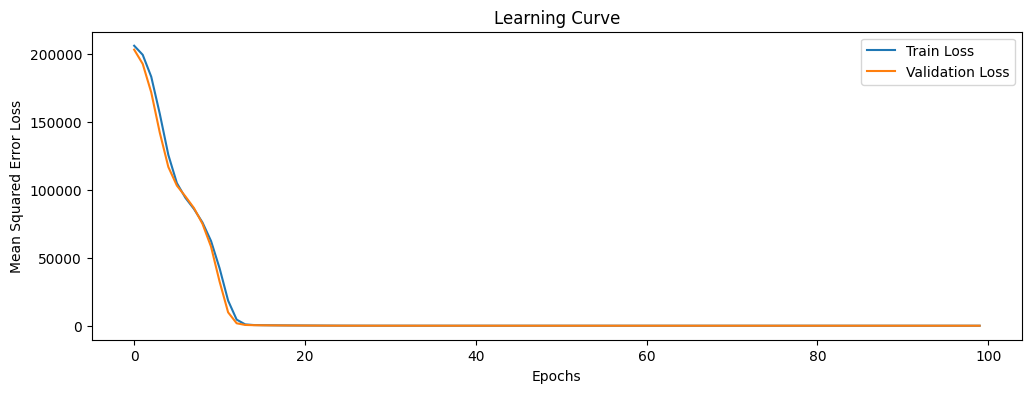

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# From above graph it is clear that the model is not overfitting

# Step 7 - Model evaluation

In [38]:
import math
train_mse, train_mae = model.evaluate(xtrain_pre, ytrain)
train_rmse = math.sqrt(train_mse)
print(f"Training RMSE : {train_rmse:.2f}")
print(f"Training MAE : {train_mae:.2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.3492 - mae: 3.3990
Training RMSE : 4.32
Training MAE : 3.41


In [39]:
test_mse, test_mae = model.evaluate(xtest_pre, ytest)
test_rmse = math.sqrt(test_mse)
print(f"Testing RMSE : {test_rmse:.2f}")
print(f"Testing MAE : {test_mae:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 17.4007 - mae: 3.3442
Testing RMSE : 4.26
Testing MAE : 3.38


In [40]:
ypred_train = model.predict(xtrain_pre)
ypred_train[0:5]

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[448.98676],
       [478.8808 ],
       [467.7112 ],
       [434.06186],
       [465.58035]], dtype=float32)

In [41]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [42]:
ypred_test = model.predict(xtest_pre)
ypred_test[0:5]

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[431.25766],
       [481.78546],
       [479.06726],
       [448.7627 ],
       [444.43994]], dtype=float32)

In [43]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [44]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
  # Predict results on x
  ypred = model.predict(x)
  # Calculate the metrics
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  # Print the results
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [45]:
evaluate_model(model, xtrain_pre, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.32
MAE : 3.41
MAPE : 0.75%
R2 : 93.50%


In [46]:
evaluate_model(model, xtest_pre, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE : 4.26
MAE : 3.38
MAPE : 0.74%
R2 : 93.98%


# Above results say that it is a good model becasue R2 score > 0.8 both in train and test

In [47]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [48]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [49]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [50]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [51]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[443.61365],
       [439.95953],
       [429.9918 ],
       [440.22018],
       [471.9662 ]], dtype=float32)

# Save above predictions in dataframe

In [52]:
xnew["PE_pred"] = preds.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,443.609985
1,28.88,54.89,1007.16,46.60,439.959991
2,27.89,73.21,1001.32,85.88,429.989990
3,25.69,62.26,1011.38,74.08,440.220001
4,12.16,40.81,1025.79,70.97,471.970001
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.049988
96,11.78,39.96,1011.37,82.95,472.029999
97,5.62,41.38,1020.91,86.21,484.720001
98,24.96,74.99,1008.25,80.52,436.220001


<Axes: xlabel='PE_pred', ylabel='Count'>

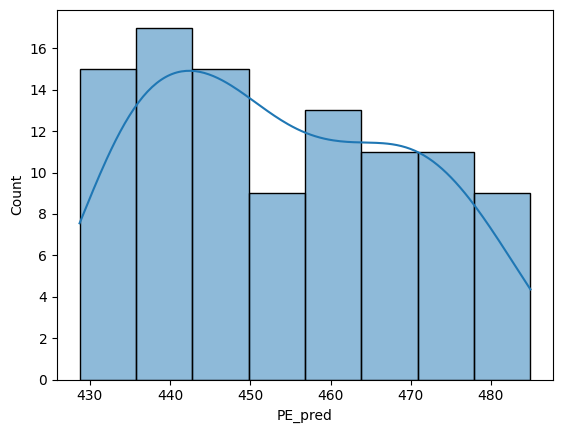

In [53]:
sns.histplot(data=xnew, x="PE_pred", kde=True)

In [54]:
xnew.to_csv("results.csv", index=False)

# Save the model objects

In [55]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [58]:
import joblib
joblib.dump(num_pipe, "plant_pre.joblib")

['plant_pre.joblib']

In [59]:
# Save the neural network
model.save("plant_model.keras")

# Loading the pre and keras model

In [60]:
p = joblib.load("plant_pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [61]:
from keras.models import load_model

m = load_model("plant_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)